## Artificial Neural Network 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image
# 이미지 로드해주는 라이브러리

→ 컴퓨터는 이미지를 픽셀 단위 즉, 숫자로 읽는다. → 앞서 집 값을 예측했던 것 처럼, 각 필셀 하나하나의 값을 input으로 하면 학습이 가능 할 것 같다.

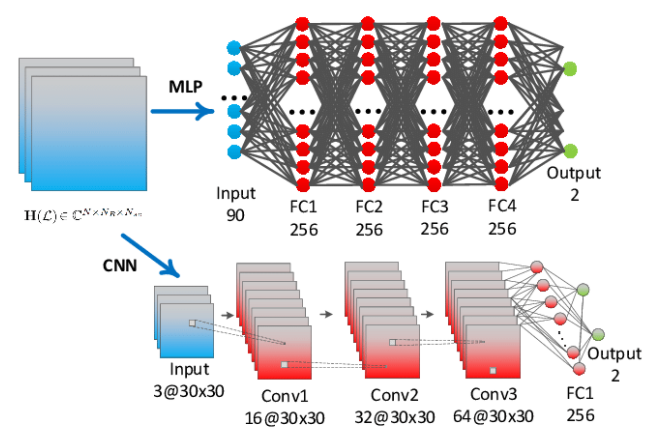

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mlp_conv.png')

→ 앞서 boston dataset과 다르지 않다. 이미지도 결국 픽셀값 하나하나를 모델의 input으로 입력한다.<br> CNN은 다음 수업때 진행.

In [ ]:
import numpy as np 
# linear algebra를 다루는 라이브러리
import pandas as pd 
# data processing을 다루는 라이브러리
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# 경고무시

##### 1) 이미지를 불러오고 시각화 : Keras fashion mnist dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
# 여러가지 학습용 이미지가 저장되어있는 라이브러리

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 전체 데이터 셋 6만개 중 5만개는 학습용, 1만개는 테스트 용으로 분리

4431872/4422102 [==============================] - 0s 0us/step


* 데이터 갯수 확인

In [ ]:
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


* 시각화

In [ ]:
import matplotlib.pyplot as plt
# 시각화에 사용하는 라이브러리
%matplotlib inline
# 실행하면 바로 노트북에서 보여줄 수 있게 해주는 역할

In [ ]:
train_images[0]
# image 한장이 전부 0~255사이의 숫자-픽셀 값으로 되어있다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

* 이미지 일부 시각화

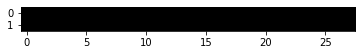

In [ ]:
plt.imshow(train_images[0][:2], cmap='gray')

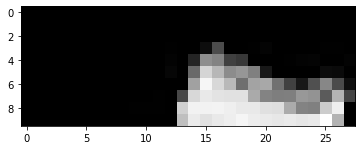

In [ ]:
plt.imshow(train_images[0][:10], cmap='gray')

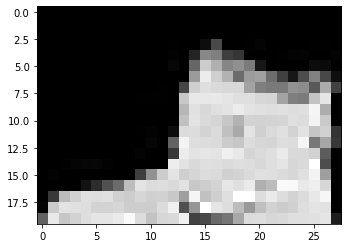

In [ ]:
plt.imshow(train_images[0][:20], cmap='gray')

In [ ]:
train_labels[0]
# 0~9에 해당하는 숫자로 label이 표현되어있다.

9

In [ ]:
train_images[0].shape

(28, 28)

Text(0.5, 1.0, '9')

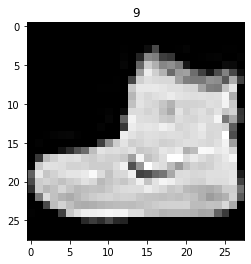

In [ ]:
plt.imshow(train_images[0], cmap='gray')
# 첫번째 이미지를 그려보자.
# cmap : color map
plt.title(train_labels[0])
# class 이름을 title

Text(0.5, 1.0, '9')

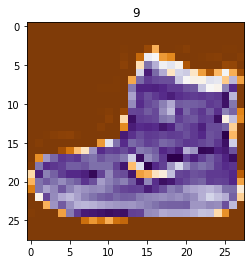

In [ ]:
plt.imshow(train_images[0], cmap='PuOr')
plt.title(train_labels[0])

Text(0.5, 1.0, '0')

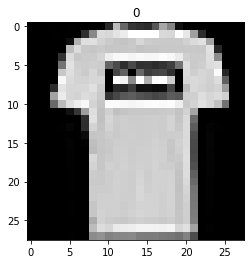

In [ ]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])

* class name 입력 : label이 숫자로 나오는 것 보다 name으로 나왔으면 좋겠다.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 각 숫자 0~9에 해당하는 class의 정보를 입력

In [ ]:
class_names[9]

'Ankle boot'

In [ ]:
class_names[1]

'Trouser'

* 한번에 여러개의 이미지 시각화

In [ ]:
def show_images(images, labels, ncols=8):
    # 이미지를 한번에 여러개 보여주고 싶다. 여기서는 1x8로 총 8개
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    # 이미지를 보여줄 규격과 1x8에서 각 해당하는 위치를 잡는 것이다. 22x6은 규격, nrows는 행, ncols은 열을 말한다.
    for i in range(ncols):
        # 열만 존재하기에 열 갯수만큼 반복하면서
        axs[i].imshow(images[i], cmap='gray')
        # 각각에 해당하는 위치에 이미지를 시각화한다.
        axs[i].set_title(class_names[labels[i]])
        # 이미지에 해당하는 class_name도 함께 시각화 한다.

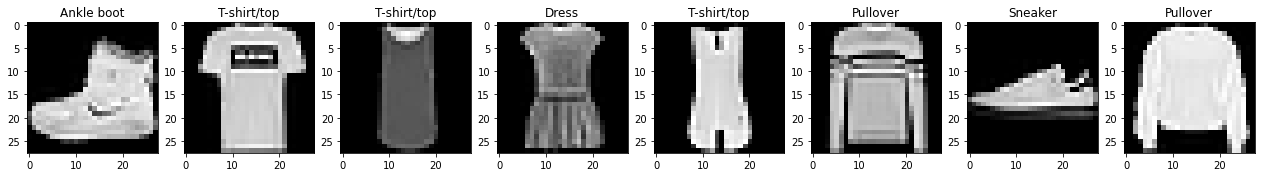

In [ ]:
show_images(train_images[:8], train_labels[:8], ncols=8)

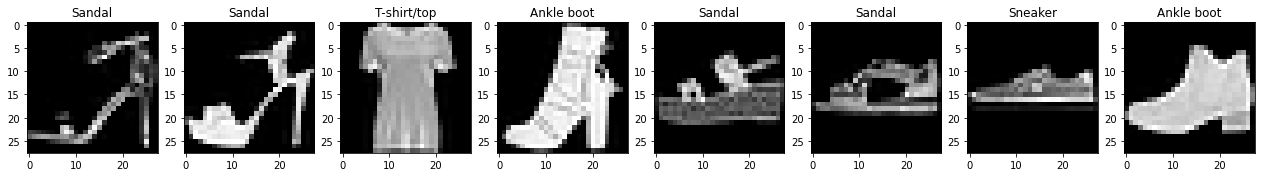

In [ ]:
show_images(train_images[8:16], train_labels[8:16], ncols=8)

##### 2) 이미지 정규화

* 0 ~ 255 → 0 ~ 1 : 
<br> scale을 줄임으로 기울기의 크기를 제한. 손실표면을 더 매끄럽게 함.
<br> 빠른 최적화 GD에 용이.

In [ ]:
def gpd(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    # 이미지의 픽셀 값을 255로 나눈다.
    labels = np.array(labels)
    # 각각 데이터 타입을 numpy array로 변경한다.
    return images, labels

In [ ]:
train_images, train_labels = gpd(train_images, train_labels)
# train에 적용
test_images, test_labels = gpd(test_images, test_labels)
# test에 적용

* 문제 없음을 확인

In [ ]:
print('train dataset shape:', train_images.shape, train_labels.shape)
# shape 확인
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

→ 0~1 사이의 값으로 변환

Text(0.5, 1.0, '9')

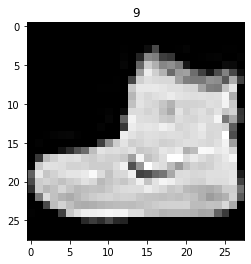

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

Text(0.5, 1.0, '0')

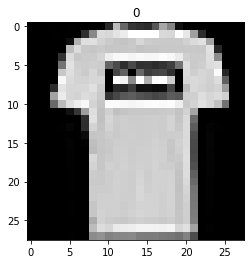

In [ ]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])

##### 3) Artificial Neural Network 구축

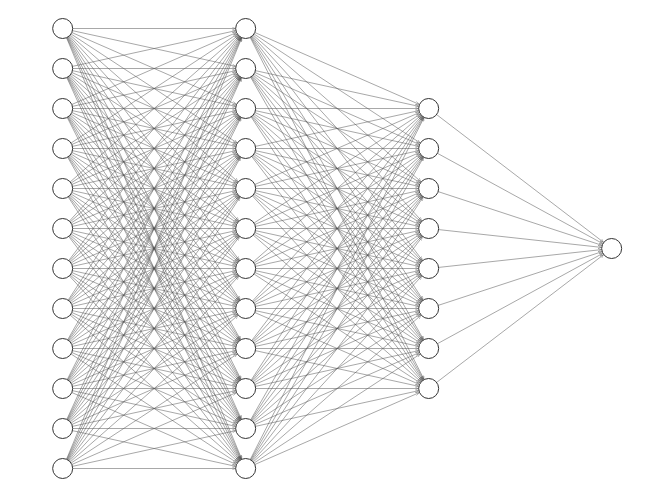

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/ANN.png')

→ 위와 같은 ANN에 이미지의 픽셀 하나하나를 input으로 입력하여 label을 예측할 것이다.

* Image input size 

Text(0.5, 1.0, '0')

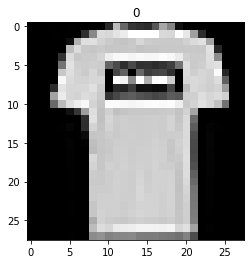

In [ ]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])
# 이미지의 가로x세로를 확인해보자 : 28x28

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
INPUT_SIZE = 28
# fashion mnist : 28x28

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
# perceptron, flatten 해주는 라이브러리 불러오기
from tensorflow.keras.models import Sequential 
# Sequential 하게 모델을 연결해주는 라이브러리 불러오기
from tensorflow.keras import optimizers
# optimizer

In [ ]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 처음들어오는 28x28 입력을 784로 펼쳐준다.
    Dense(100, activation='relu'),
    # 784 -> 100
    Dense(30, activation='relu'),
    # 100 -> 30
    Dense(10, activation='softmax')
    # 30 -> 10
    # 최종 출력은 class의 갯수로 한다 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


* Loss와 Optimizer 설정

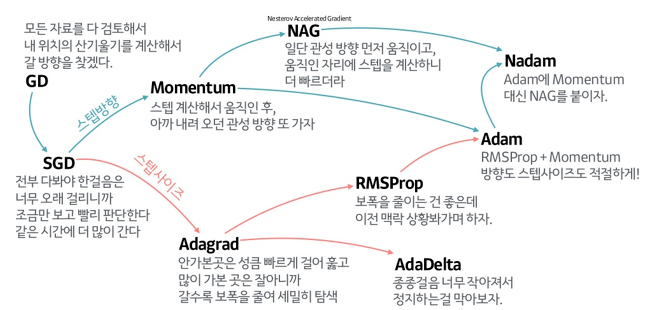

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/optim.png')

In [ ]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 처음들어오는 28x28 입력을 784로 펼쳐준다.
    Dense(100, activation='relu'),
    # 784 -> 100
    Dense(30, activation='relu'),
    # 100 -> 30
    Dense(10, activation='softmax')
    # 30 -> 10
    # 최종 출력은 class의 갯수로 한다 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)
# label을 category 변수로 변경

In [ ]:
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 2ms/step - loss: 0.5833 - accuracy: 0.8010
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8575
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3698 - accuracy: 0.8687
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8779
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8830
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3057 - accuracy: 0.8891
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.8922
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.8973
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2742 - accuracy: 0.8995
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2667 - accuracy: 0.9021

* test data로 예측 : 이미지 한장의 경우 28x28의 차원이지만, 모델에 사용하려면 학습 당시 입력 데이터의 차원과 동일하게 맞춰줘야한다.<br> :학습 당시 (batch_size) x W x H 로 입력하였다.

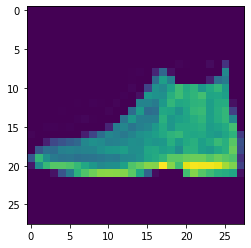

In [ ]:
plt.imshow(test_images[0])

In [ ]:
test_images[0].shape

(28, 28)

In [ ]:
np.expand_dims(test_images[0], axis=0).shape
# train 당시 차원과 차원을 맞춰주기 위해서 첫번째 축(axis=0)에 한 차원 늘려준다. (batch, w, h)

(1, 28, 28)

In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
# 각각의 label에 해당하는 확률 출력된다.

softmax output: [[1.3994808e-04 1.2390448e-08 2.8250020e-06 2.8644894e-07 2.4003896e-06
  7.7223091e-04 3.7068439e-05 2.7397657e-02 2.5787036e-05 9.7162175e-01]]


In [ ]:
pred_proba.max()

0.97162175

In [ ]:
pred_proba.argmax()

9

In [ ]:
pred = np.argmax(np.squeeze(pred_proba))
# 가장 높은 확률을 갖는 값의 인덱스를 저장한다.
# np.squeeze : 차원 제거
print('predicted class value:', pred)

predicted class value: 9


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* 실제 값과 예측 값이 동일한지 확인해본다.

In [ ]:
print('target class value:', class_names[test_labels[0]], 'predicted class value:', class_names[pred])

target class value: Ankle boot predicted class value: Ankle boot


* test 전체로 model의 정확도 검증

In [ ]:
128*79

10112

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=128)
# crossentropy의 loss와 accuracy가 출력값이다. train 성능보다 낮은 것을 알 수 있음.

79/79 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8791


[0.3396361470222473, 0.8791000247001648]

##### train하면서 test에 적용하면 얼마나 정확한지 미리 알 수 없을까? : valid dataset 사용

* 데이터 다시 불러오기

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 픽셀 정규화 시키는 함수 
def gpd(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = gpd(train_images, train_labels)
test_images, test_labels = gpd(test_images, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
# train -> train, valid
from tensorflow.keras.utils import to_categorical
# one-hot

* 학습용 데이터 중 일부를 검증용으로 분리

In [ ]:
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2022)
# test_size : valid로 사용할 비율
print('train & validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

train & validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)


* one-hot encoding

In [ ]:
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)
# category 변수로 변환

In [ ]:
print('before OHE:', tr_labels.shape, val_labels.shape)

before OHE: (51000,) (9000,)


In [ ]:
print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

after OHE: (51000, 10) (9000, 10)


In [ ]:
tr_oh_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

* 검증 데이터를 적용하면서 학습 : 학습에 사용하지 않은 데이터로 검증

In [ ]:
INPUT_SIZE = 28
model = Sequential([ # dense layer 여러개 이어붙이는 용도
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)), # image를 펴준다.
    Dense(100, activation='relu'), # 784 -> 100
    Dense(30, activation='relu'), # 100 -> 30
    Dense(10, activation='softmax') # 30 -> 10 : 최종출력은 이미지 class 갯수
])

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), # validation_data 입력
                    epochs=20, verbose=1)
# validation_data에 valid image와 label을 입력

Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.5310 - accuracy: 0.8080 - val_loss: 0.4173 - val_accuracy: 0.8537
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3877 - accuracy: 0.8610 - val_loss: 0.3795 - val_accuracy: 0.8640
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.8719 - val_loss: 0.3616 - val_accuracy: 0.8692
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8790 - val_loss: 0.3531 - val_accuracy: 0.8742
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8847 - val_loss: 0.3458 - val_accuracy: 0.8761
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.8884 - val_loss: 0.3353 - val_accuracy: 0.8798
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2965 - accuracy: 0.8910 - val_loss: 0.3334 - val_accuracy: 0.8808
Epoch 

→ 학습용 데이터로 학습을 하면서 검증용 데이터로 검증 성능을 보여준다.

* loss, accuracy 변화 추이 확인
<br> train보다 valid성능이 낮은 것을 알 수 있다.

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.531048059463501, 0.3877246379852295, 0.35345062613487244, 0.333877295255661, 0.3175034523010254, 0.3065741956233978, 0.2964598536491394, 0.2856781482696533, 0.2781725525856018, 0.2703149616718292, 0.2645874619483948, 0.2561551630496979, 0.25331610441207886, 0.24509137868881226, 0.2414916753768921, 0.23676060140132904, 0.23183347284793854, 0.2263070046901703, 0.22309531271457672, 0.2201666235923767]
[0.8080000281333923, 0.8609607815742493, 0.8719215393066406, 0.8790000081062317, 0.8847255110740662, 0.8884313702583313, 0.8909608125686646, 0.8958039283752441, 0.8977646827697754, 0.9015098214149475, 0.902137279510498, 0.9057254791259766, 0.9059215784072876, 0.909686267375946, 0.9101764559745789, 0.9119019508361816, 0.9148039221763611, 0.9159607887268066, 0.9165098071098328, 0.9183725714683533]
[0.41732537746429443, 0.37949931621551514, 0.3616292476654053, 0.35309281945228577, 0.34581178426742554, 0.33525004982948303, 0.33340591192245483, 0.32457080483436584, 0.3223651945590973, 0.319873

* 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

* 학습된 accuracy 시각화

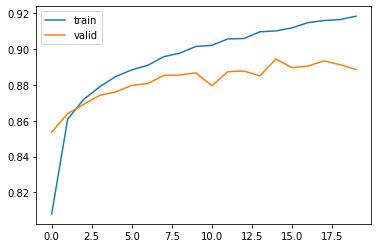

In [ ]:
plt.plot(history.history['accuracy'], label='train')
# x축은 y값에 맞춰 여기서는 Epoch
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

* test

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8813


[0.35414159297943115, 0.8812999725341797]

### 다양한 Model 구축 방법

* model을 만드는 여러가지 방법이 존재

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
#from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
INPUT_SIZE = 28

* Sequential을 사용하여 이어 붙이는 방법

In [ ]:
# 이전까지 사용하던 방법
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 하나하나 이어붙이는 방법
model = Sequential()
model.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


* 원하는 layer를 하나씩 함수로 만드는 방법

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 30)                3030      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 함수화 시켜서 모델 구축 및 전처리 학습 진행

In [ ]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
INPUT_SIZE = 28

* model function

In [ ]:
def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    # input size 
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

* preprocessing function

In [ ]:
def gpd(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

* one-hot encoding function

In [ ]:
def gpohe(images, labels):
    images, labels = gpd(images, labels)
    # gpd
    oh_labels = to_categorical(labels)
    return images, oh_labels

* train, valid, test set function

In [ ]:
def gtvt(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2022):
    
    train_images, train_oh_labels = gpohe(train_images, train_labels)
    # one-hot encoding & preprocessing
    test_images, test_oh_labels = gpohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

* 위에서 구현한 함수 적용

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 데이터 다시 로드

In [ ]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    gtvt(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2022)

In [ ]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


* model 생성

In [ ]:
model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 30)                3030      
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

* 학습

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
399/399 [==============================] - 2s 3ms/step - loss: 0.5140 - accuracy: 0.8172 - val_loss: 0.4256 - val_accuracy: 0.8504
Epoch 2/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8631 - val_loss: 0.3662 - val_accuracy: 0.8680
Epoch 3/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8745 - val_loss: 0.3485 - val_accuracy: 0.8720
Epoch 4/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8813 - val_loss: 0.3483 - val_accuracy: 0.8744
Epoch 5/20
399/399 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8860 - val_loss: 0.3302 - val_accuracy: 0.8810
Epoch 6/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2964 - accuracy: 0.8910 - val_loss: 0.3342 - val_accuracy: 0.8816
Epoch 7/20
399/399 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.8947 - val_loss: 0.3281 - val_accuracy: 0.8796
Epoch 

* 결과 시각화 함수 구현

In [ ]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    # x좌표는 epoch y좌표는 accuray
    plt.plot(history.history['val_accuracy'], label='valid') 
    plt.legend()

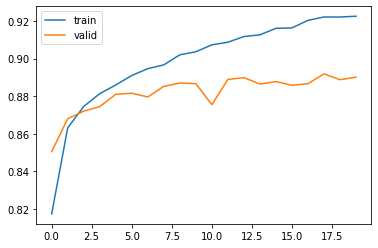

In [ ]:
show_history(history)

### Callback

* ModelCheckpoint : 특정 조건에 맞춰서 모델을 저장하고 싶다.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 학습 중간에 원하는 체크포인트를 만들 수 있는 라이브러리

In [ ]:
!mkdir weights
# 폴더 생성

In [ ]:
model = create_model()
# 앞서 정의한 함수로 모델을 생성
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 30)                3030      
                                                                 
 dense_23 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mcp = ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', save_freq='epoch', verbose=1)

# filepath : 파라미터를 저장할 경로 weights라는 폴더에 weights. 으로 저장하겠다.
# : 02d 2자리 10진수, .2f 소수점 둘째자리 소수
# monitor : monitor할 지표
# save_best_only : 가장 좋은 성능을 나타내는 모델만 저장할지 여부 False이면 매번의 epoch 다 저장
# save_weights_only : weights만 저장할지 여부 False이면 모델도 전부 저장.
# mode : 지표가 감소해야 좋은지 증가해야 좋은지
# save_freq : 저장 빈도수

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp])

Epoch 1/20
394/399 [============================>.] - ETA: 0s - loss: 0.5335 - accuracy: 0.8115
Epoch 1: val_loss improved from inf to 0.41269, saving model to weights/weights.01-0.41.hdf5
399/399 [==============================] - 2s 3ms/step - loss: 0.5319 - accuracy: 0.8120 - val_loss: 0.4127 - val_accuracy: 0.8537
Epoch 2/20
389/399 [============================>.] - ETA: 0s - loss: 0.3847 - accuracy: 0.8612
Epoch 2: val_loss improved from 0.41269 to 0.38738, saving model to weights/weights.02-0.39.hdf5
399/399 [==============================] - 1s 3ms/step - loss: 0.3842 - accuracy: 0.8616 - val_loss: 0.3874 - val_accuracy: 0.8622
Epoch 3/20
392/399 [============================>.] - ETA: 0s - loss: 0.3491 - accuracy: 0.8736
Epoch 3: val_loss improved from 0.38738 to 0.36050, saving model to weights/weights.03-0.36.hdf5
399/399 [==============================] - 1s 3ms/step - loss: 0.3486 - accuracy: 0.8734 - val_loss: 0.3605 - val_accuracy: 0.8710
Epoch 4/20
393/399 [============

* 불러와서 사용하기 : 왼쪽 폴더 → weight 폴더에서 경로복사

In [ ]:
model.load_weights('/content/weights/weights.12-0.31.hdf5') 
# 가중치 경로 복사해서 넣어준다.

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 30)                3030      
                                                                 
 dense_23 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss,acc = model.evaluate(test_images,  test_oh_labels, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8814


* ReduceLRPlateau : 특정 횟수동안, 성능이 좋아지지 않으면 동적으로 Learning rate을 감소시킴

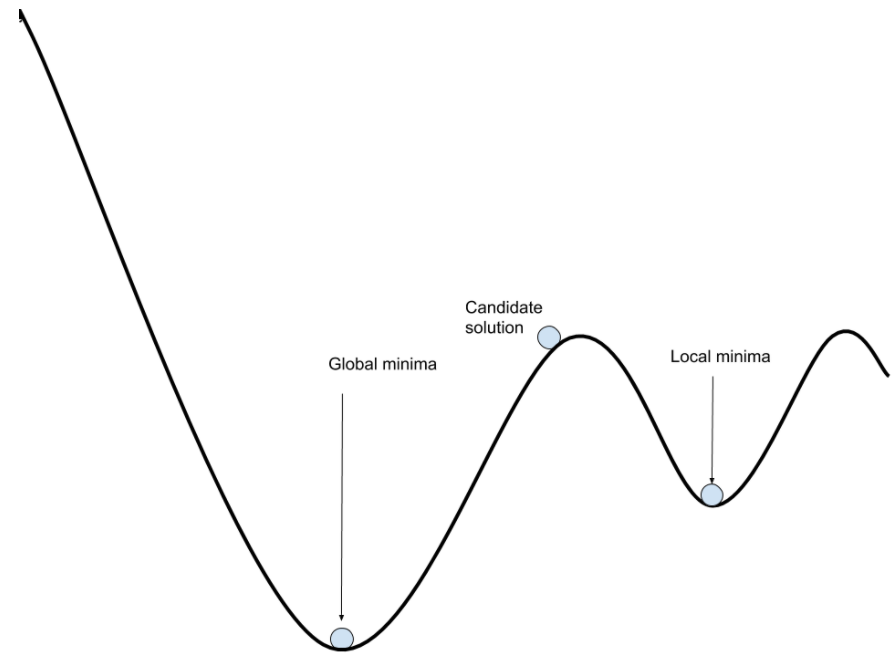

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/lr_rd.png')

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# learning rate을 줄이는 라이브러리

In [ ]:
model = create_model()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
# factor: 인수-커지게 할 수 도 있고 줄일 수 도 있다. new_lr = factor * lr
# patience : lr을 변경하기 전에 기다려볼 epoch횟수

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=20, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr])

Epoch 1/20
797/797 [==============================] - 3s 3ms/step - loss: 0.4897 - accuracy: 0.8264 - val_loss: 0.3917 - val_accuracy: 0.8592 - lr: 0.0010
Epoch 2/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3706 - accuracy: 0.8650 - val_loss: 0.3649 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 3/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3365 - accuracy: 0.8775 - val_loss: 0.3447 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 4/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3173 - accuracy: 0.8838 - val_loss: 0.3364 - val_accuracy: 0.8778 - lr: 0.0010
Epoch 5/20
797/797 [==============================] - 2s 3ms/step - loss: 0.2984 - accuracy: 0.8898 - val_loss: 0.3157 - val_accuracy: 0.8879 - lr: 0.0010
Epoch 6/20
797/797 [==============================] - 2s 3ms/step - loss: 0.2865 - accuracy: 0.8941 - val_loss: 0.3420 - val_accuracy: 0.8761 - lr: 0.0010
Epoch 7/20
797/797 [==============================] - 2s 3ms/step - lo

* EarlyStopping : 특정 epoch동안 성능이 개선되지 않을 시에 학습을 중단

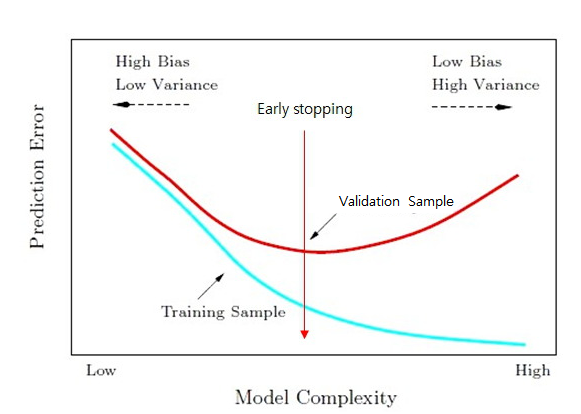

In [ ]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/early.png')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = create_model()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ely = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
# patience : early stopping 적용 전에 기다려볼 epoch횟수

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=20, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely])

Epoch 1/20
797/797 [==============================] - 3s 3ms/step - loss: 0.6679 - accuracy: 0.7825 - val_loss: 0.5069 - val_accuracy: 0.8298
Epoch 2/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4753 - accuracy: 0.8365 - val_loss: 0.4560 - val_accuracy: 0.8427
Epoch 3/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4376 - accuracy: 0.8479 - val_loss: 0.4262 - val_accuracy: 0.8541
Epoch 4/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4154 - accuracy: 0.8547 - val_loss: 0.4095 - val_accuracy: 0.8577
Epoch 5/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3991 - accuracy: 0.8596 - val_loss: 0.4011 - val_accuracy: 0.8609
Epoch 6/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3865 - accuracy: 0.8652 - val_loss: 0.3889 - val_accuracy: 0.8636
Epoch 7/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3762 - accuracy: 0.8668 - val_loss: 0.3833 - val_accuracy: 0.8649
Epoch 

* 세가지 모두 적용

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
model = create_model()
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mcp = ModelCheckpoint(filepath='weights/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                        save_best_only=True, save_weights_only=True, mode='min', save_freq='epoch', verbose=0)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=64, epochs=20, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp, rlr, ely])

Epoch 1/20
797/797 [==============================] - 4s 3ms/step - loss: 0.6662 - accuracy: 0.7823 - val_loss: 0.5069 - val_accuracy: 0.8300 - lr: 9.0000e-05
Epoch 2/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4779 - accuracy: 0.8392 - val_loss: 0.4567 - val_accuracy: 0.8420 - lr: 9.0000e-05
Epoch 3/20
797/797 [==============================] - 3s 3ms/step - loss: 0.4444 - accuracy: 0.8477 - val_loss: 0.4407 - val_accuracy: 0.8477 - lr: 9.0000e-05
Epoch 4/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4238 - accuracy: 0.8539 - val_loss: 0.4183 - val_accuracy: 0.8539 - lr: 9.0000e-05
Epoch 5/20
797/797 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8582 - val_loss: 0.4102 - val_accuracy: 0.8598 - lr: 9.0000e-05
Epoch 6/20
797/797 [==============================] - 2s 3ms/step - loss: 0.3961 - accuracy: 0.8633 - val_loss: 0.4006 - val_accuracy: 0.8606 - lr: 9.0000e-05
Epoch 7/20
797/797 [==========================